In [ ]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
# prompt: drop misssing value

df = df.dropna()

Menambah fitur-fitur yang berguna untuk eksplorasi data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
!pip install haversine
from haversine import haversine


def haversine_distance(row):
  """Calculates the Haversine distance between pickup and dropoff coordinates."""
  pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
  dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
  return haversine(pickup_coords, dropoff_coords)

# Preprocessing
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month
df['trip_duration_minutes'] = df['trip_duration'] / 60
df['trip_duration_hours'] = df['trip_duration'] / 3600
df['distance'] = df.apply(haversine_distance, axis=1)
df['speed'] = df['distance'] / df['trip_duration_hours']


In [ ]:
# prompt: check there is distance equal 0

print("Number of trips with distance 0:", len(df[df['distance'] == 0]))
print("Percentage of trips with distance 0:", (len(df[df['distance'] == 0]) / len(df)) * 100)

Number of trips with distance 0: 0
Percentage of trips with distance 0: 0.0


In [ ]:
df = df[df['distance'] > 0]

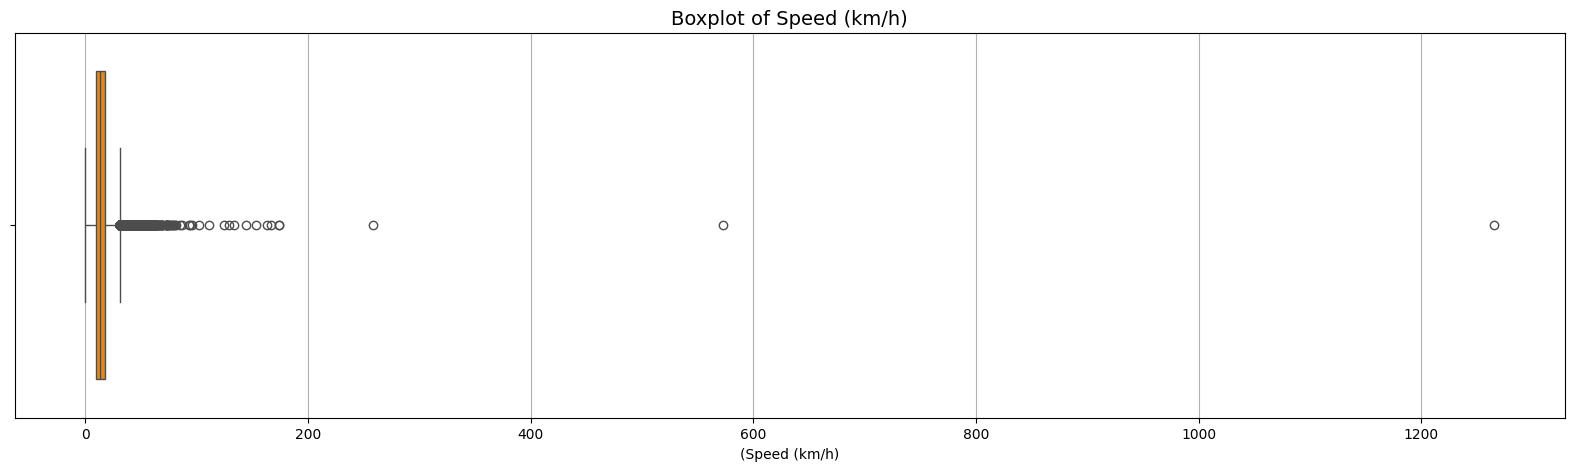

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Lebar diperbesar, tinggi dirampingkan
sns.boxplot(x=(df['speed']), color='darkorange')
plt.title('Boxplot of Speed (km/h)', fontsize=14)
plt.xlabel('(Speed (km/h)')
plt.grid(True, axis='x')
plt.show()


Terlihat bahwa terdapat outlier yang sangat jauh sehingga plot sangat skewed, maka akan digunakan log transform agar bisa terlihat lebih jelas

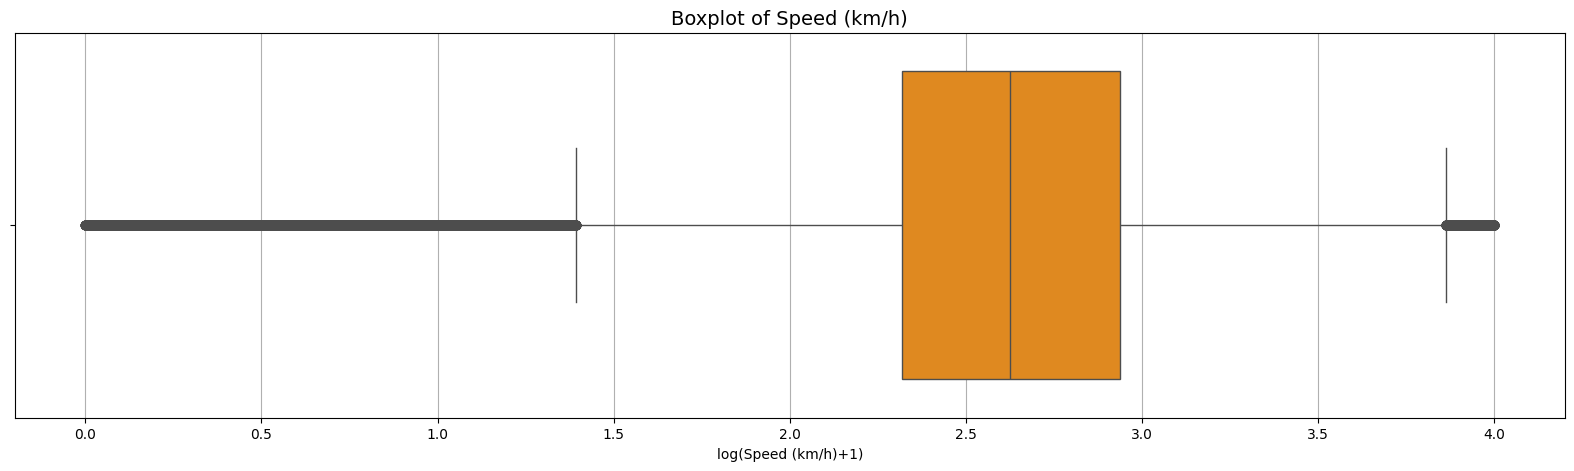

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Lebar diperbesar, tinggi dirampingkan
sns.boxplot(x=np.log1p(df['speed']), color='darkorange')
plt.title('Boxplot of Speed (km/h)', fontsize=14)
plt.xlabel('log(Speed (km/h)+1)')
plt.grid(True, axis='x')
plt.show()


Berdasarkan plot tersebut kita drop log(speed+1)>4


In [ ]:
df = df[np.log1p(df['speed']) <= 4]

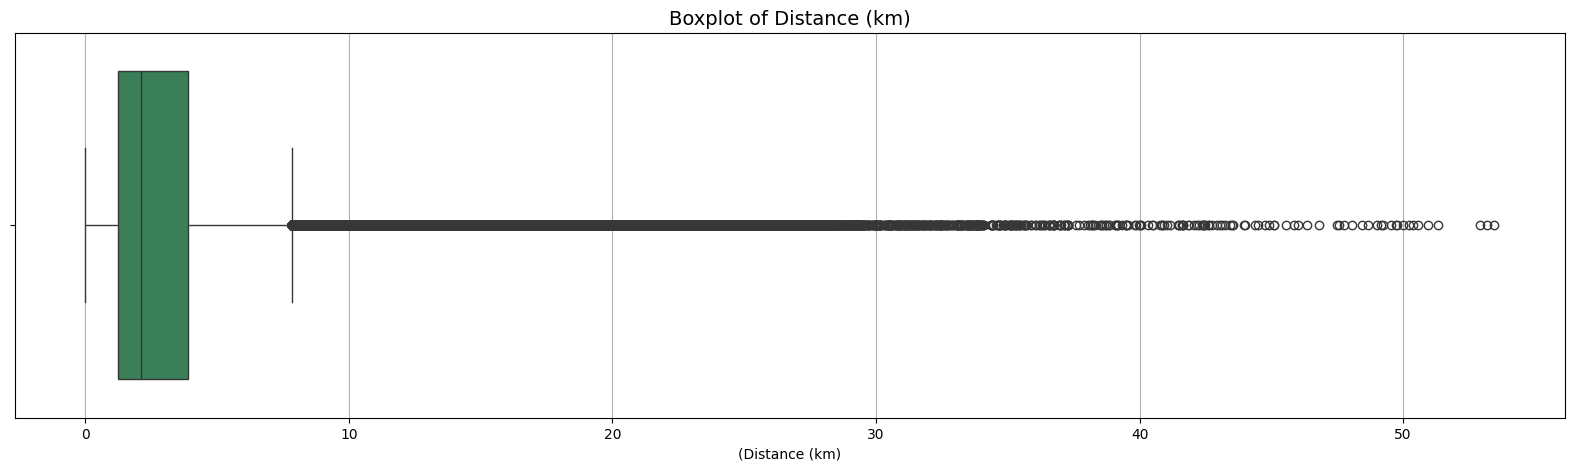

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Lebar besar, tinggi ramping
sns.boxplot(x=(df['distance']), color='seagreen')
plt.title('Boxplot of Distance (km)', fontsize=14)
plt.xlabel('(Distance (km)')
plt.grid(True, axis='x')
plt.show()


Terlihat bahwa terdapat outlier yang sangat jauh sehingga plot sangat skewed, maka akan digunakan log transform agar bisa terlihat lebih jelas

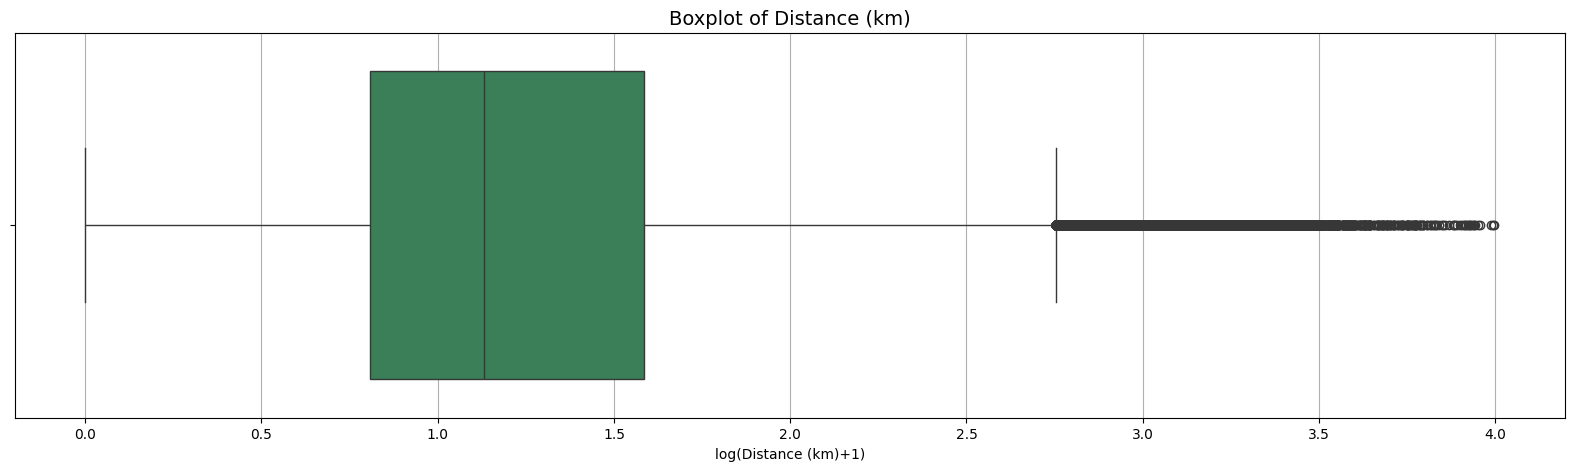

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Lebar besar, tinggi ramping
sns.boxplot(x=np.log1p(df['distance']), color='seagreen')
plt.title('Boxplot of Distance (km)', fontsize=14)
plt.xlabel('log(Distance (km)+1)')
plt.grid(True, axis='x')
plt.show()

Untuk distance meskipun terdapat outlier yang parah, tidak banyak yang di drop karena masih mungkin terdapat perjalanan jauh

In [ ]:
df['log_speed'] = np.log1p(df['speed'])
df['log_distance'] = np.log1p(df['distance'])

In [ ]:
df = df[df['log_distance'] <= 4]

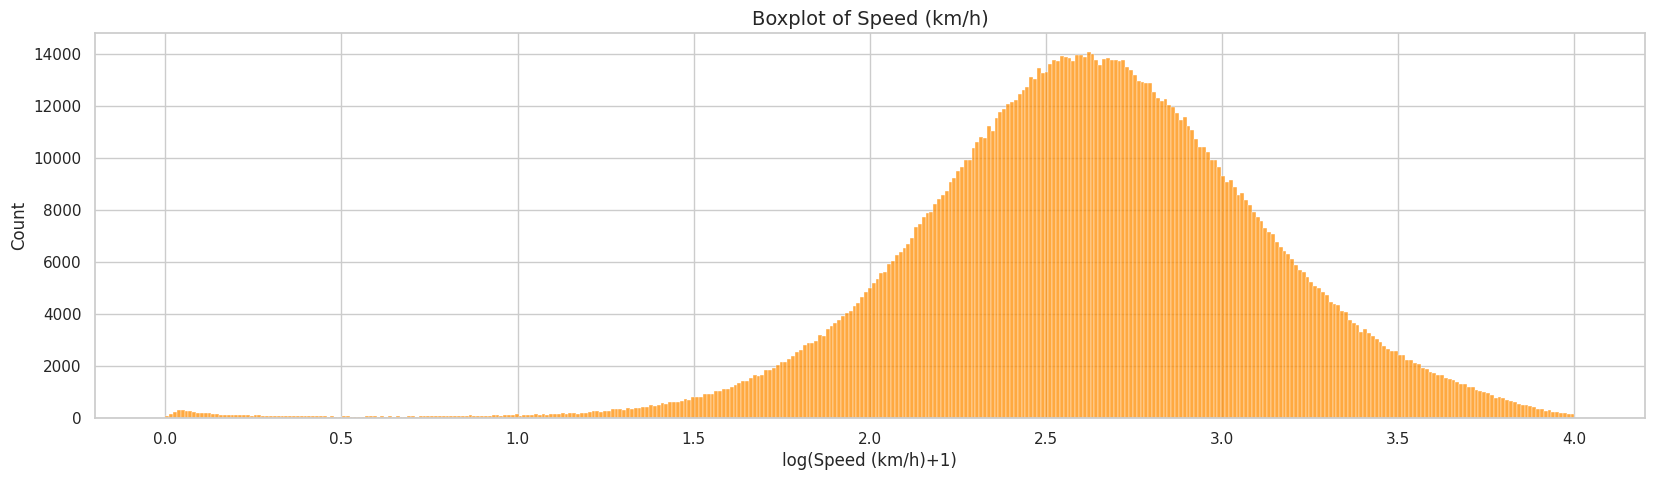

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Lebar diperbesar, tinggi dirampingkan
sns.histplot(x=df['log_speed'], color='darkorange')
plt.title('Boxplot of Speed (km/h)', fontsize=14)
plt.xlabel('log(Speed (km/h)+1)')
plt.grid(True, axis='x')
plt.show()

Bisa kita lihat dari grafik tersebut mayoritas kecepatan berada dalam rentang 1,7 km/h sampai 53 km/h (angka di grafik di transformasi dulu)

In [ ]:
np.expm1(1)

np.float64(1.718281828459045)

In [ ]:
np.expm1(4)

np.float64(53.598150033144236)

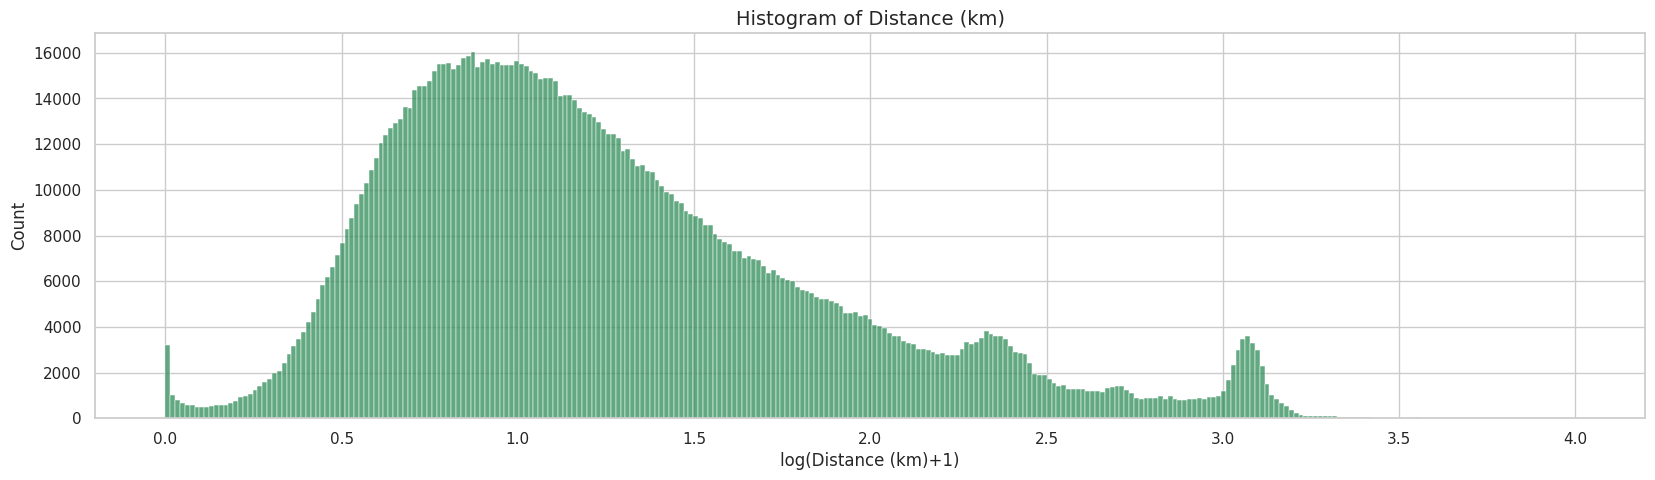

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Lebar besar, tinggi ramping
sns.histplot(x=df['log_distance'], color='seagreen')
plt.title('Histogram of Distance (km)', fontsize=14)
plt.xlabel('log(Distance (km)+1)')
plt.grid(True, axis='x')
plt.show()

Bisa kita lihat dari grafik tersebut mayoritas jarak berada dalam rentang 0,6 km sampai 6 km/h (angka di grafik di transformasi dulu)

In [ ]:
np.expm1(0.5)

np.float64(0.6487212707001282)

In [ ]:
np.expm1(2)

np.float64(6.38905609893065)

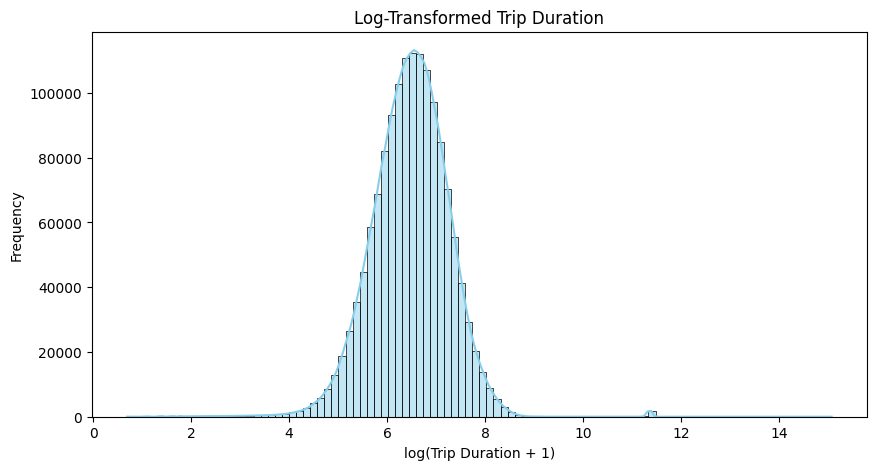

In [ ]:
import numpy as np
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['trip_duration']), bins=100, kde=True, color='skyblue')
plt.title('Log-Transformed Trip Duration')
plt.xlabel('log(Trip Duration + 1)')
plt.ylabel('Frequency')
plt.show()

Bisa kita lihat dari grafik tersebut mayoritas kecepatan berada dalam rentang 147 detik / 5 menit  km sampai 2979 detik / 49 menit (angka di grafik di transformasi dulu)

In [ ]:
np.expm1(5)

np.float64(147.4131591025766)

In [ ]:
np.expm1(8)

np.float64(2979.9579870417283)

In [ ]:
df=df[df['trip_duration']<=3000]

<ipython-input-34-ae0fa551b655>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vendor_id', data=df, palette='cividis')


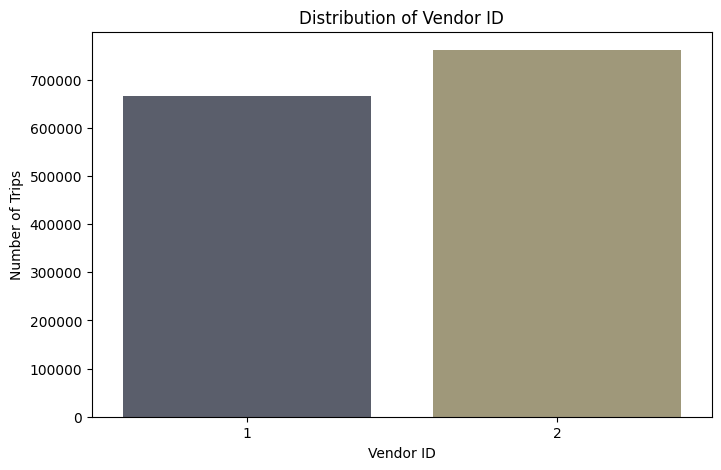

In [ ]:
# prompt: visualize vendor_id

plt.figure(figsize=(8, 5))
sns.countplot(x='vendor_id', data=df, palette='cividis')
plt.title('Distribution of Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Trips')
plt.show()

<ipython-input-35-0c1b97b3e157>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='store_and_fwd_flag', data=df, palette='coolwarm')


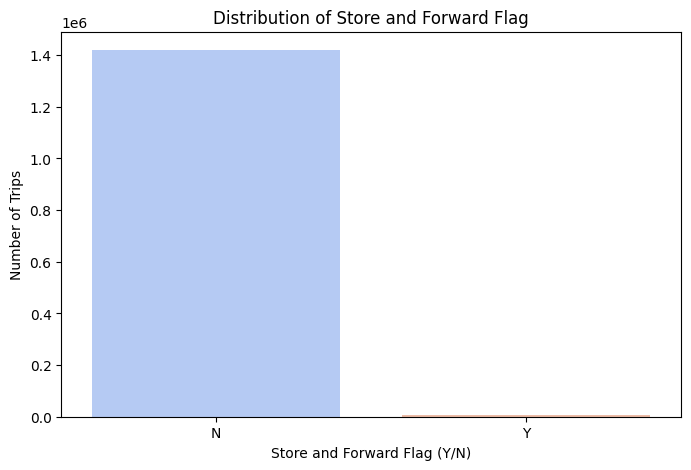

In [ ]:
# prompt: visualize flag

plt.figure(figsize=(8, 5))
sns.countplot(x='store_and_fwd_flag', data=df, palette='coolwarm')
plt.title('Distribution of Store and Forward Flag')
plt.xlabel('Store and Forward Flag (Y/N)')
plt.ylabel('Number of Trips')
plt.show()

In [ ]:
df[df['store_and_fwd_flag']=='Y'].value_counts()

,,,,,,,,,,,count
id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,
id3999872,1,2016-04-21 11:26:55,2016-04-21 11:27:07,2,-73.974693,40.750687,-73.974686,40.750729,Y,12,1
id0000626,1,2016-04-22 02:23:08,2016-04-22 02:28:36,1,-73.994911,40.721584,-73.975540,40.733196,Y,328,1
id0000743,1,2016-03-23 14:47:19,2016-03-23 15:08:52,1,-73.980873,40.746372,-73.991089,40.760319,Y,1293,1
id0000781,1,2016-02-04 13:06:58,2016-02-04 13:14:14,1,-73.979965,40.765747,-73.961655,40.771667,Y,436,1
id0001158,1,2016-01-14 20:44:44,2016-01-14 21:02:04,1,-73.986397,40.740467,-74.008453,40.707825,Y,1040,1
...,...,...,...,...,...,...,...,...,...,...,...
id0007929,1,2016-04-09 17:47:46,2016-04-09 17:56:38,1,-73.982567,40.751751,-73.979057,40.761093,Y,532,1
id0007067,1,2016-05-05 23:49:25,2016-05-05 23:53:05,1,-73.987930,40.769718,-73.990974,40.760582,Y,220,1
id0006766,1,2016-02-16 10:12:18,2016-02-16 10:31:44,1,-74.007980,40.738770,-73.978607,40.744949,Y,1166,1


<ipython-input-36-c51122a1517f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=df, palette='plasma')


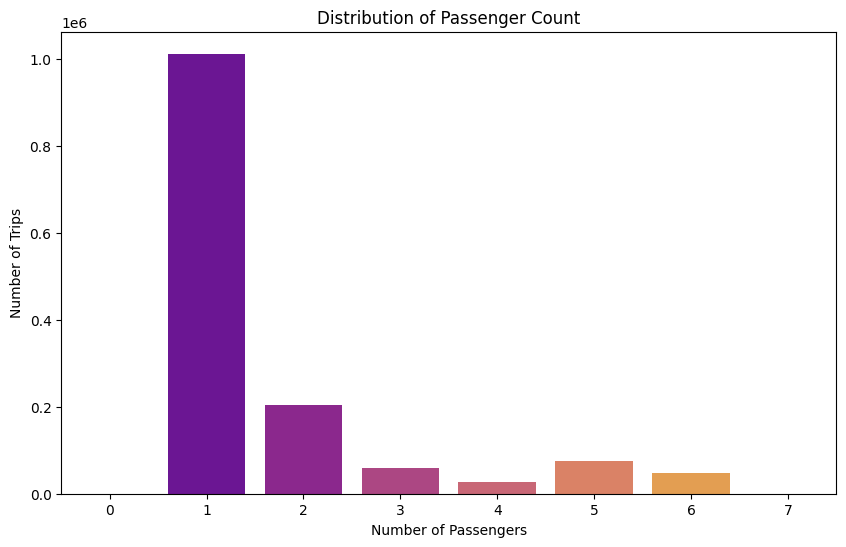

In [ ]:
# prompt: visualize passenger_count

plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=df, palette='plasma')
plt.title('Distribution of Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.show()


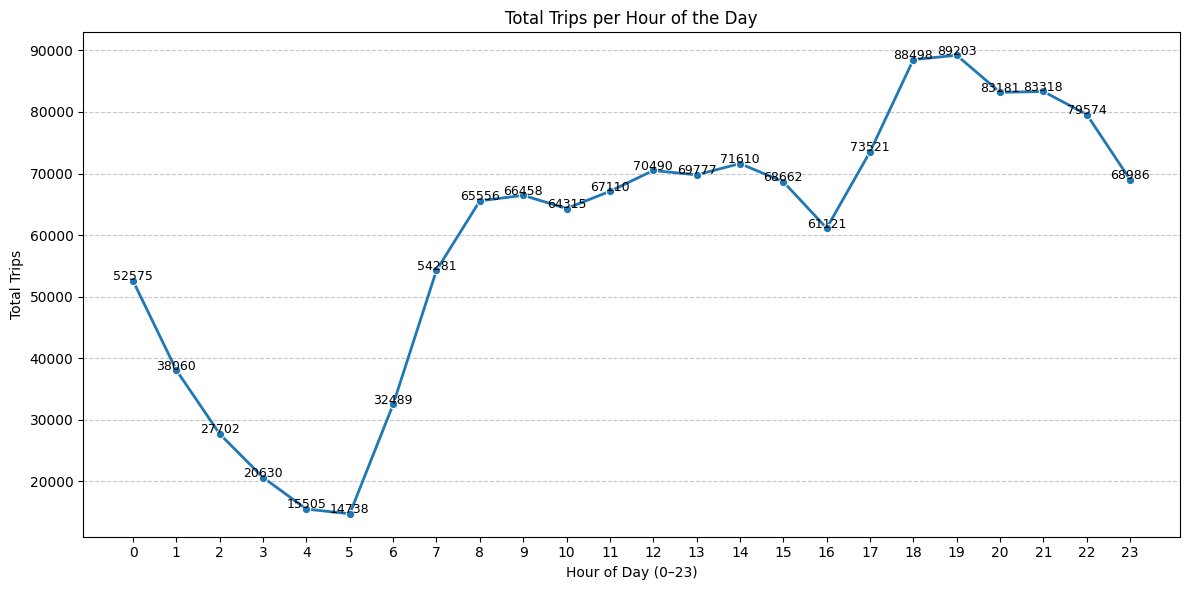

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total trip per jam
trip_per_hour = df['pickup_hour'].value_counts().sort_index()

# Plot garis
plt.figure(figsize=(12, 6))
sns.lineplot(x=trip_per_hour.index, y=trip_per_hour.values, marker='o', linewidth=2)

# Tambahkan angka di atas titik-titik
for hour, total in trip_per_hour.items():
    plt.text(hour, total + 100, str(total), color='black', ha='center', fontsize=9)

# Tambahan estetika
plt.title('Total Trips per Hour of the Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Total Trips')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-38-b33972283aa2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_weekday', data=df, palette='viridis')


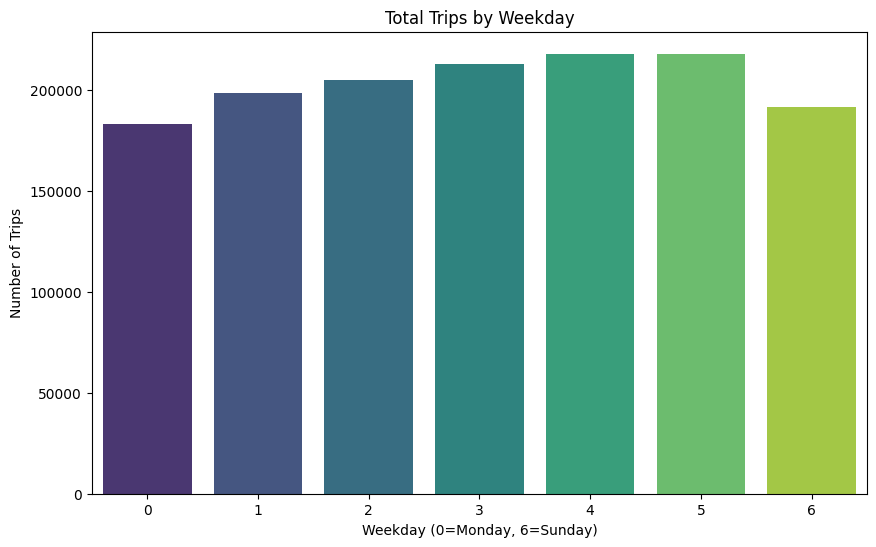

In [ ]:
# prompt: visualize total trip in weekday

plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_weekday', data=df, palette='viridis')
plt.title('Total Trips by Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')
plt.show()

<ipython-input-41-a981c450ec74>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_per_month.index, y=trip_per_month.values, palette='viridis')


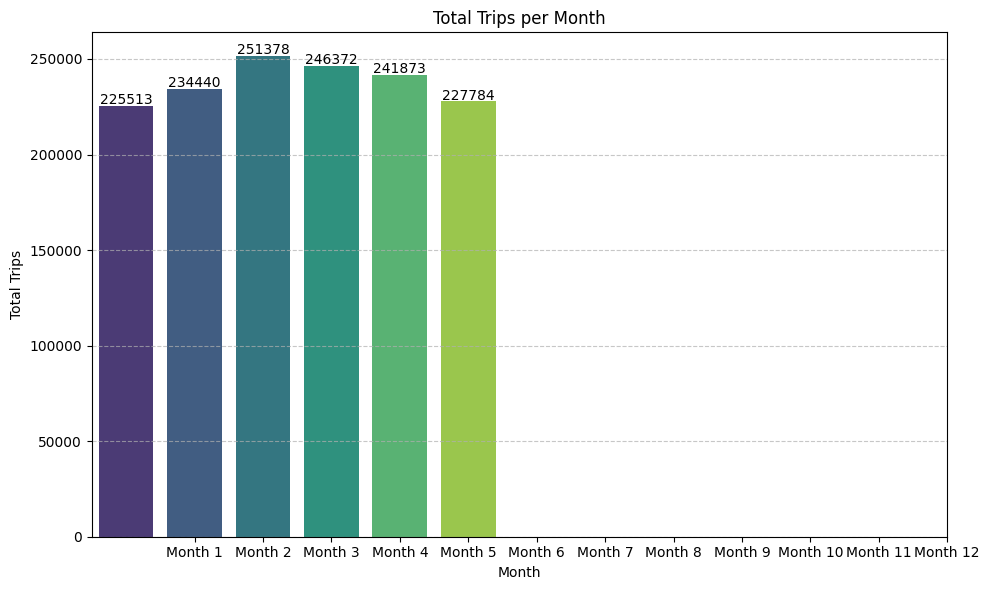

In [ ]:
# prompt: visualize total in month

trip_per_month = df['pickup_month'].value_counts().sort_index()


# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=trip_per_month.index, y=trip_per_month.values, palette='viridis')

# Add text labels on top of the bars
for index, value in enumerate(trip_per_month.values):
    plt.text(index, value + 1000, str(value), ha='center')

plt.title('Total Trips per Month')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.xticks(ticks=range(1, 13), labels=[f'Month {i}' for i in range(1, 13)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

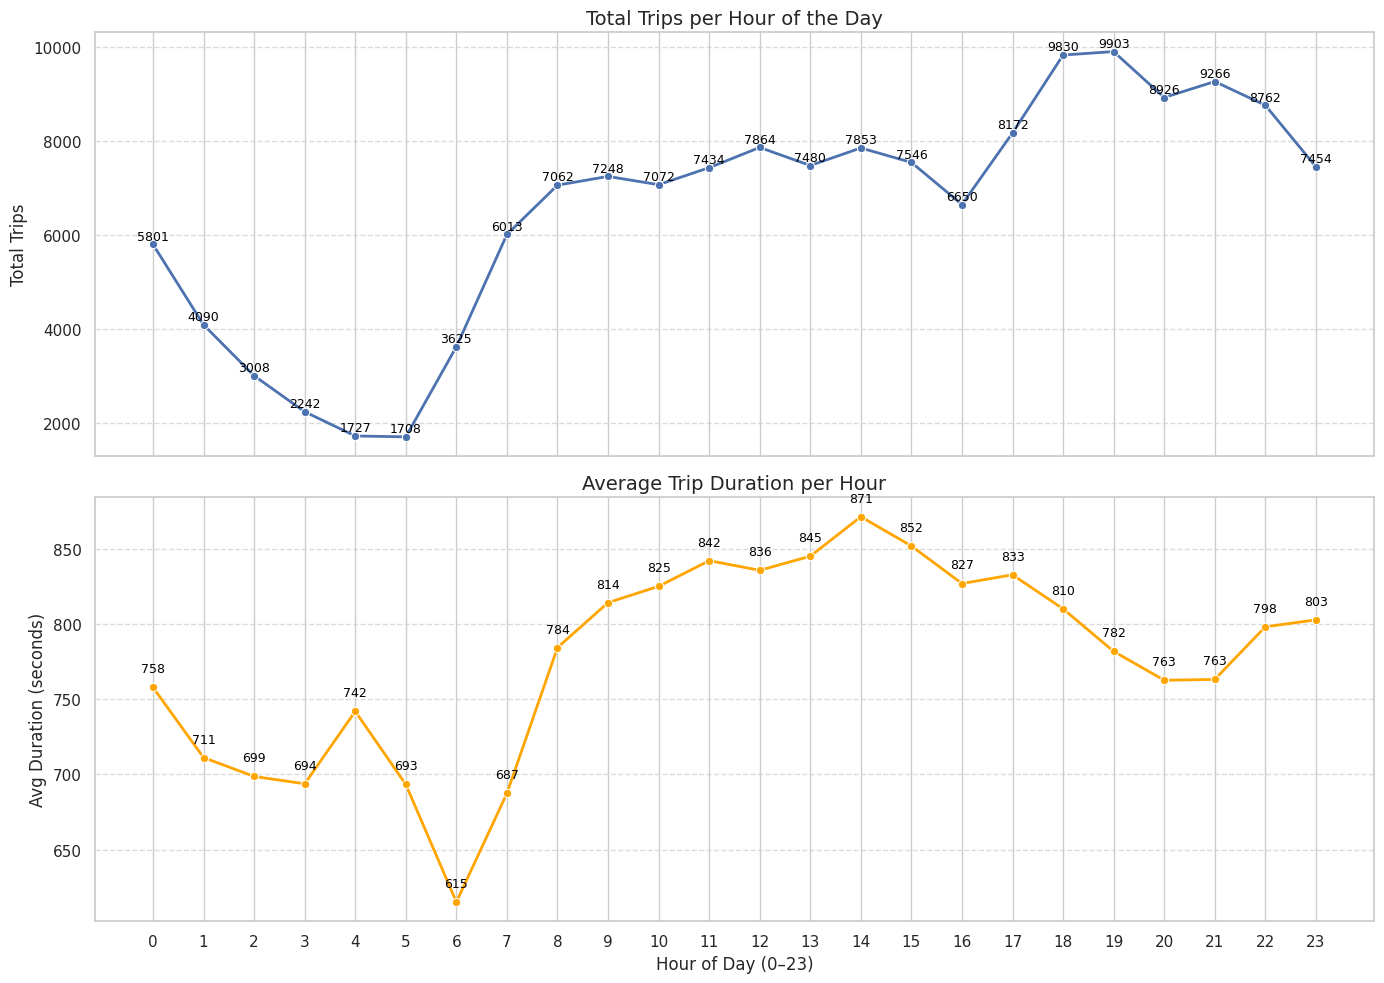

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi datetime dan ekstraksi jam


# --- Data 1: Total trip per jam
trip_per_hour = df['pickup_hour'].value_counts().sort_index()

# --- Data 2: Rata-rata trip_duration per jam
average_duration_by_hour = df.groupby('pickup_hour')['trip_duration'].mean().reset_index()


# --- Setup plot
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# --- Plot 1: Total Trips per Hour
sns.lineplot(ax=axes[0], x=trip_per_hour.index, y=trip_per_hour.values, marker='o', linewidth=2)
axes[0].set_title('Total Trips per Hour of the Day', fontsize=14)
axes[0].set_ylabel('Total Trips', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for hour, total in trip_per_hour.items():
    axes[0].text(hour, total + 100, str(total), ha='center', fontsize=9, color='black')

# --- Plot 2: Average Trip Duration per Hour
sns.lineplot(ax=axes[1], data=average_duration_by_hour, x='pickup_hour', y='trip_duration', marker='o', linewidth=2, color='orange')
axes[1].set_title('Average Trip Duration per Hour', fontsize=14)
axes[1].set_xlabel('Hour of Day (0–23)', fontsize=12)
axes[1].set_ylabel('Avg Duration (seconds)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for index, row in average_duration_by_hour.iterrows():
    axes[1].text(row['pickup_hour'], row['trip_duration'] + 10, f"{row['trip_duration']:.0f}", ha='center', fontsize=9, color='black')



plt.xticks(range(24))
plt.tight_layout()
plt.show()


<ipython-input-47-b5b8ebd231e0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_day = sns.barplot(


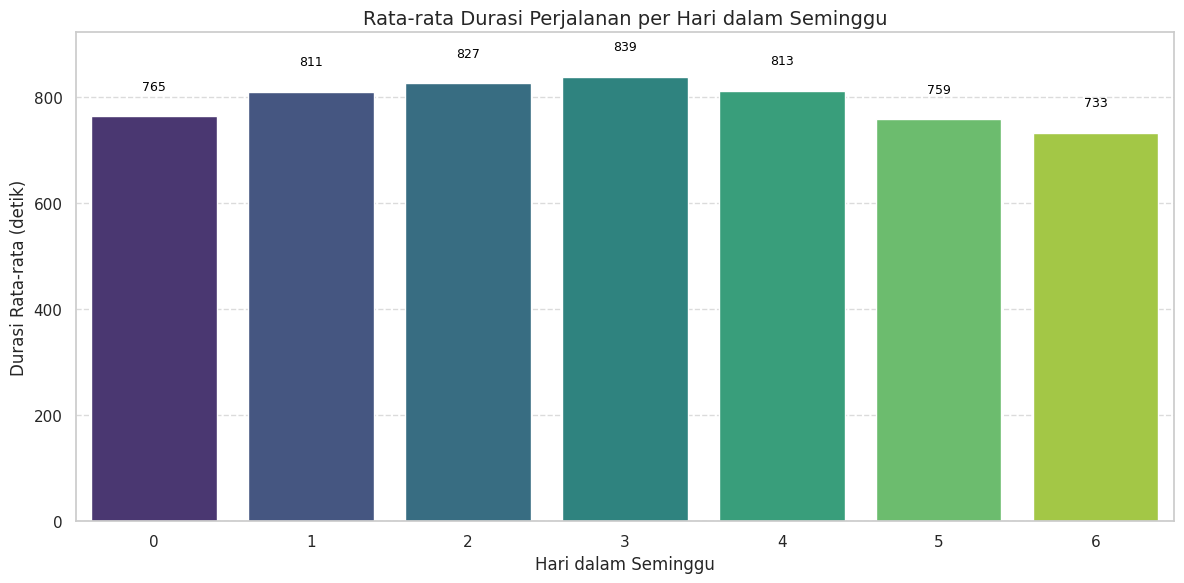

In [ ]:
average_duration_by_day = df.groupby('pickup_weekday')['trip_duration'].mean().reset_index()

# Rename the column for clarity in the plot
average_duration_by_day = average_duration_by_day.rename(columns={'pickup_weekday': 'pickup_day_of_week'})

# Set style seaborn
sns.set_theme(style="whitegrid")

# Plot barplot
plt.figure(figsize=(12, 6))
barplot_day = sns.barplot(
    data=average_duration_by_day,
    x='pickup_day_of_week',
    y='trip_duration',
    palette='viridis'
)

# Tambahkan angka rata-rata di atas setiap batang
for index, row in average_duration_by_day.iterrows():
    barplot_day.text(index, row['trip_duration'] + 50, f"{row['trip_duration']:.0f}",
                 color='black', ha="center", fontsize=9)

# Judul dan label yang lebih jelas
plt.title('Rata-rata Durasi Perjalanan per Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Durasi Rata-rata (detik)', fontsize=12)
plt.ylim(0, average_duration_by_day['trip_duration'].max() * 1.1) # Adjust y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

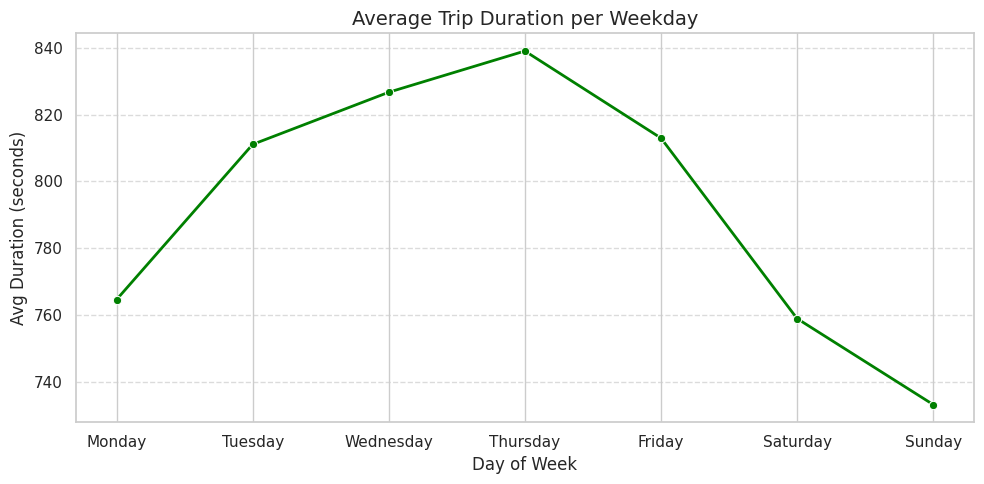

In [ ]:
# --- Data 3: Rata-rata trip_duration per minggu
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_duration_by_weekday = df.groupby('pickup_weekday')['trip_duration'].mean().reset_index()
average_duration_by_weekday['weekday_name'] = average_duration_by_weekday['pickup_weekday'].apply(lambda x: weekday_labels[x])

# Sort Value
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_duration_by_weekday['weekday_name'] = pd.Categorical(
    average_duration_by_weekday['weekday_name'],
    categories=weekday_order,
    ordered=True
)

average_duration_by_weekday = average_duration_by_weekday.sort_values('weekday_name')

# --- Plot 3: Average Trip Duration per Day
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_duration_by_weekday.sort_values('weekday_name'),
             x='weekday_name', y='trip_duration',
             marker='o', linewidth=2, color='green')

plt.title('Average Trip Duration per Weekday', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Avg Duration (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-42-7dc68d85e326>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='speed', data=avg_speed_by_hour, palette='viridis')


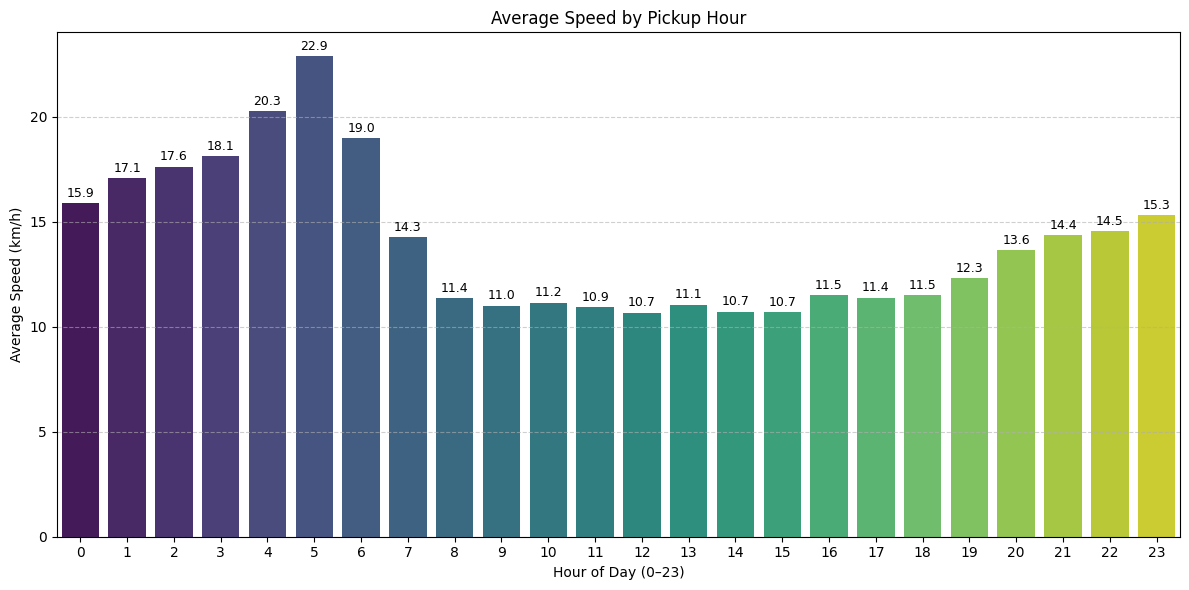

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Hitung rata-rata kecepatan per jam
avg_speed_by_hour = df.groupby('pickup_hour')['speed'].median().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='speed', data=avg_speed_by_hour, palette='viridis')

# Tambahkan angka di atas setiap batang
for index, row in avg_speed_by_hour.iterrows():
    plt.text(index, row['speed'] + 0.3, f"{row['speed']:.1f}", ha='center', fontsize=9)

# Estetika
plt.title('Average Speed by Pickup Hour')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Average Speed (km/h)')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-43-316d4d04d95b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='speed', data=avg_speed_by_hour, palette='viridis')


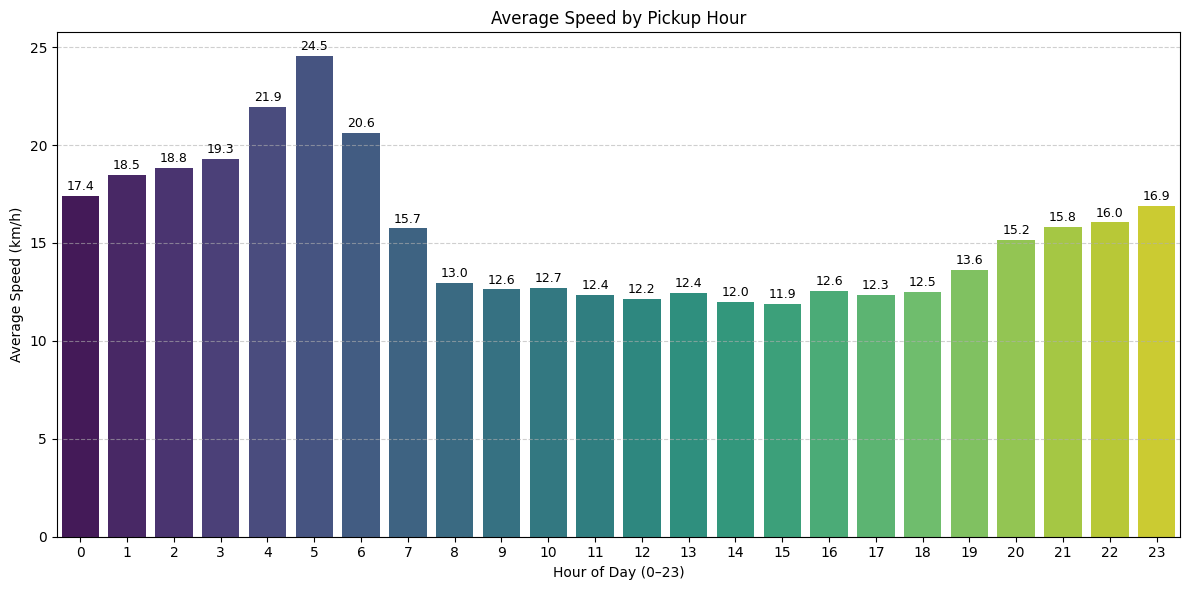

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Hitung rata-rata kecepatan per jam
avg_speed_by_hour = df.groupby('pickup_hour')['speed'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='speed', data=avg_speed_by_hour, palette='viridis')

# Tambahkan angka di atas setiap batang
for index, row in avg_speed_by_hour.iterrows():
    plt.text(index, row['speed'] + 0.3, f"{row['speed']:.1f}", ha='center', fontsize=9)

# Estetika
plt.title('Average Speed by Pickup Hour')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Average Speed (km/h)')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


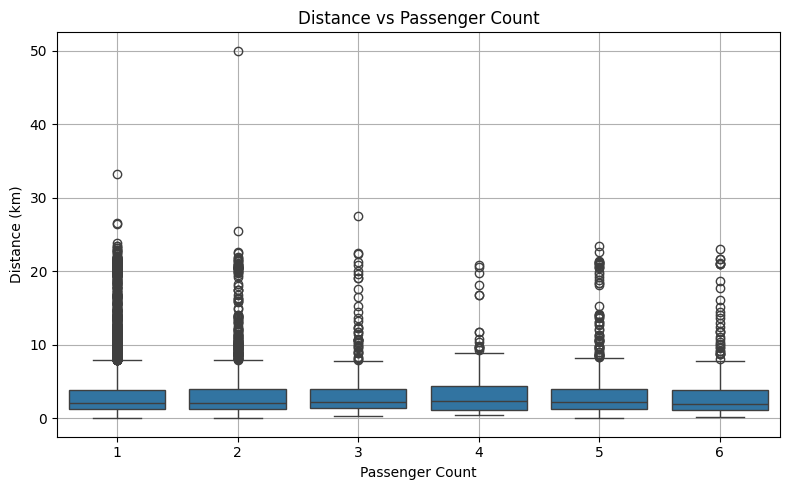

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Contoh: jika kamu punya DataFrame bernama df ---

# Sample data untuk menjaga performa visualisasi
sample_df = df[['passenger_count', 'distance', 'vendor_id', 'speed']].dropna().sample(n=10000, random_state=42)

# 1. Passenger Count vs Distance
plt.figure(figsize=(8, 5))
sns.boxplot(x='passenger_count', y='distance', data=sample_df)
plt.title('Distance vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.tight_layout()
plt.show()



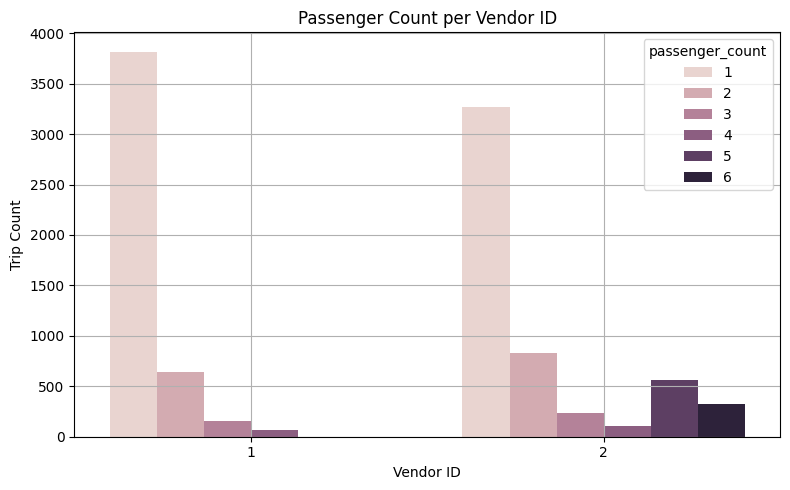

In [ ]:

# 2. Passenger Count per Vendor ID
plt.figure(figsize=(8, 5))
sns.countplot(x='vendor_id', hue='passenger_count', data=sample_df)
plt.title('Passenger Count per Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Count')
plt.grid(True)
plt.tight_layout()
plt.show()

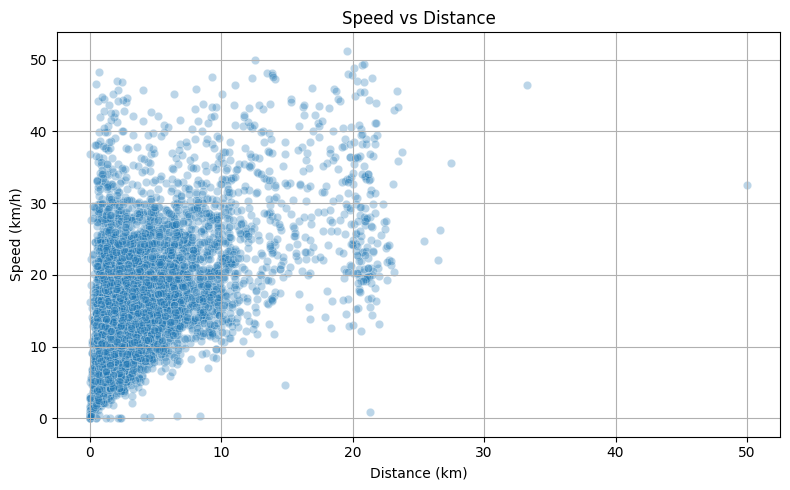

In [ ]:
# 3. Speed vs Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='distance', y='speed', data=sample_df, alpha=0.3)
plt.title('Speed vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.tight_layout()
plt.show()


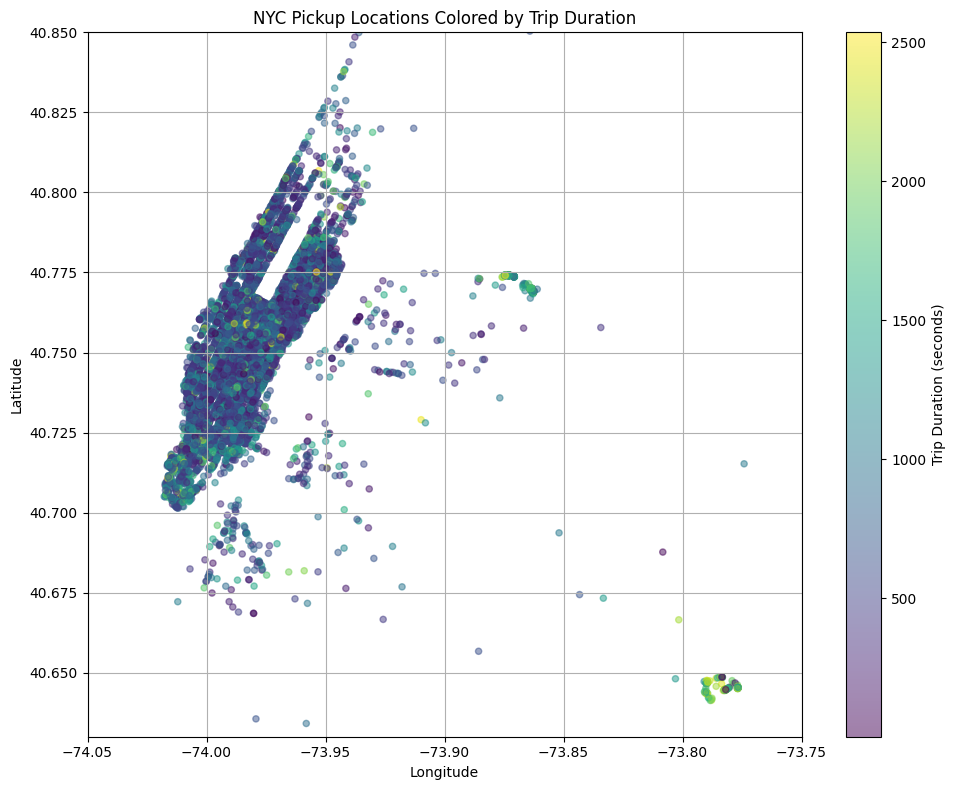

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil sampel data untuk efisiensi
sample_df = df[['pickup_latitude', 'pickup_longitude', 'trip_duration']].dropna().sample(n=10000, random_state=42)

# Batasi trip_duration agar tidak terlalu ekstrem (outlier)
sample_df = sample_df[sample_df['trip_duration'] < sample_df['trip_duration'].quantile(0.99)]

# Plot scatter dengan warna berdasarkan trip_duration
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    sample_df['pickup_longitude'],
    sample_df['pickup_latitude'],
    c=sample_df['trip_duration'],
    cmap='viridis',
    alpha=0.5,
    s=20
)
plt.colorbar(scatter, label='Trip Duration (seconds)')
plt.title('NYC Pickup Locations Colored by Trip Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.05, -73.75)
plt.ylim(40.63, 40.85)
plt.grid(True)
plt.tight_layout()
plt.show()


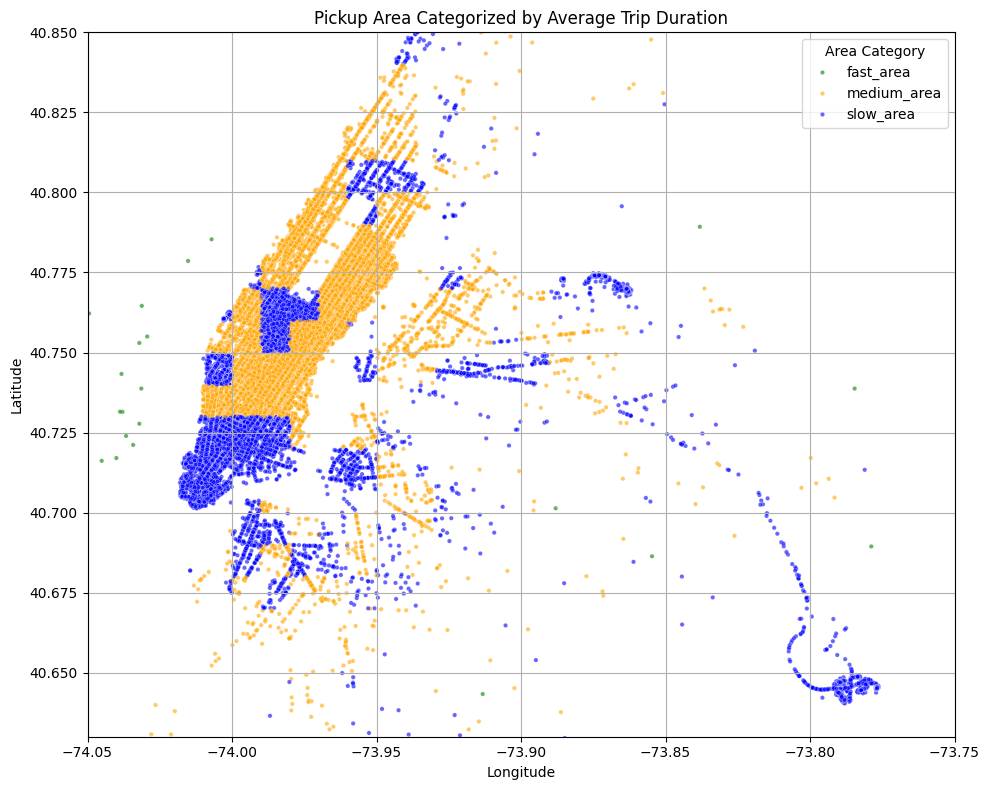

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Binning koordinat pickup
lat_bin_size = 0.01
lon_bin_size = 0.01

df['pickup_lat_bin'] = (df['pickup_latitude'] // lat_bin_size) * lat_bin_size
df['pickup_lon_bin'] = (df['pickup_longitude'] // lon_bin_size) * lon_bin_size

# 2. Hitung rata-rata trip_duration per grid
pickup_grid = df.groupby(['pickup_lat_bin', 'pickup_lon_bin'])['trip_duration'].mean().reset_index()
pickup_grid.rename(columns={'trip_duration': 'avg_duration'}, inplace=True)

# 3. Kategorikan area berdasarkan durasi rata-rata
pickup_grid['pickup_area_category'] = pd.qcut(
    pickup_grid['avg_duration'],
    q=3,
    labels=['fast_area', 'medium_area', 'slow_area']
)

# 4. Merge kembali ke df utama
df = pd.merge(
    df,
    pickup_grid[['pickup_lat_bin', 'pickup_lon_bin', 'pickup_area_category']],
    on=['pickup_lat_bin', 'pickup_lon_bin'],
    how='left'
)

# 5. Visualisasi hasil
sample = df[['pickup_latitude', 'pickup_longitude', 'pickup_area_category']].dropna().sample(n=100000, random_state=42)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=sample['pickup_longitude'],
    y=sample['pickup_latitude'],
    hue=sample['pickup_area_category'],
    palette={'fast_area': 'green', 'medium_area': 'orange', 'slow_area': 'blue'},
    alpha=0.6,
    s=10
)
plt.title('Pickup Area Categorized by Average Trip Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.05, -73.75)
plt.ylim(40.63, 40.85)
plt.legend(title='Area Category')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: encode pickup_area_category

df = pd.get_dummies(df, columns=['pickup_area_category'], prefix='pickup_area')
print(df[['pickup_area_fast_area', 'pickup_area_medium_area', 'pickup_area_slow_area']].head())


   pickup_area_fast_area  pickup_area_medium_area  pickup_area_slow_area
0                  False                    False                   True
1                  False                     True                  False
2                  False                    False                   True
3                  False                    False                   True
4                  False                     True                  False


In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,trip_duration_hours,distance,speed,log_speed,log_distance,pickup_lat_bin,pickup_lon_bin,pickup_area_fast_area,pickup_area_medium_area,pickup_area_slow_area
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0.126389,1.498523,11.856445,2.553845,0.915700,40.76,-73.99,False,False,True
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0.184167,1.805510,9.803672,2.379886,1.031585,40.73,-73.99,False,True,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0.590000,6.385107,10.822216,2.469980,1.999465,40.76,-73.98,False,False,True
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0.119167,1.485500,12.465738,2.600149,0.910474,40.71,-74.02,False,False,True
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0.120833,1.188590,9.836608,2.382930,0.783258,40.79,-73.98,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452670,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,0.216111,1.225082,5.668759,1.897434,0.799794,40.74,-73.99,False,True,False
1452671,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,0.181944,6.049844,33.251051,3.533717,1.953005,40.74,-74.01,False,False,True
1452672,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,0.212222,7.824617,36.869921,3.634157,2.177545,40.76,-73.96,False,True,False
1452673,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,0.103611,1.092565,10.544867,2.446241,0.738391,40.74,-73.99,False,True,False


<ipython-input-46-36d18b6c4d4c>:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


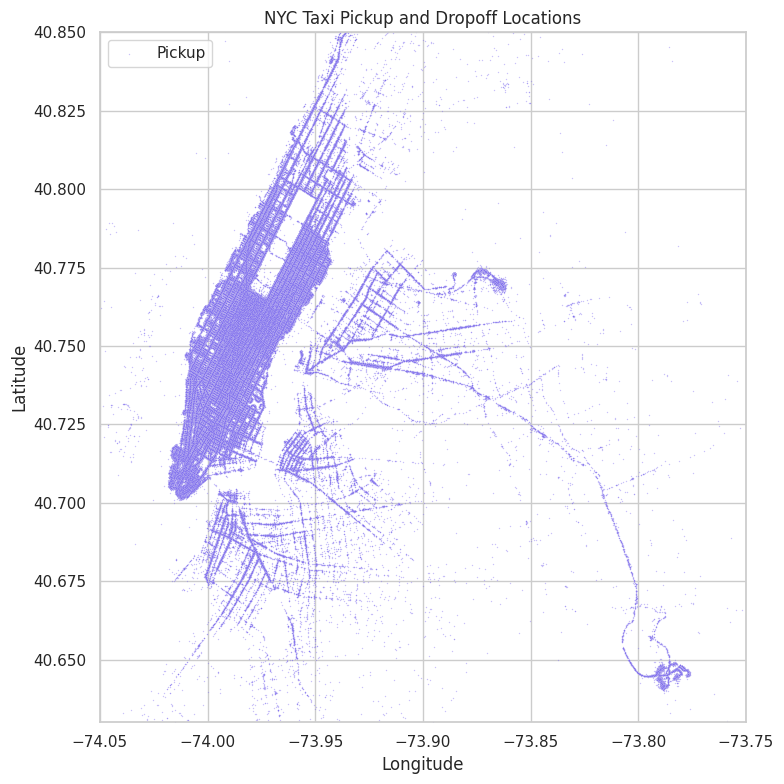

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Set style seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

# Plot pickup (biru) dan dropoff (merah)
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'],
                s=1, alpha=0.4, label="Pickup", color='mediumslateblue')



# Zoom to NYC area
plt.xlim(-74.05, -73.75)
plt.ylim(40.63, 40.85)

plt.title('NYC Taxi Pickup and Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-48-024c55c19960>:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


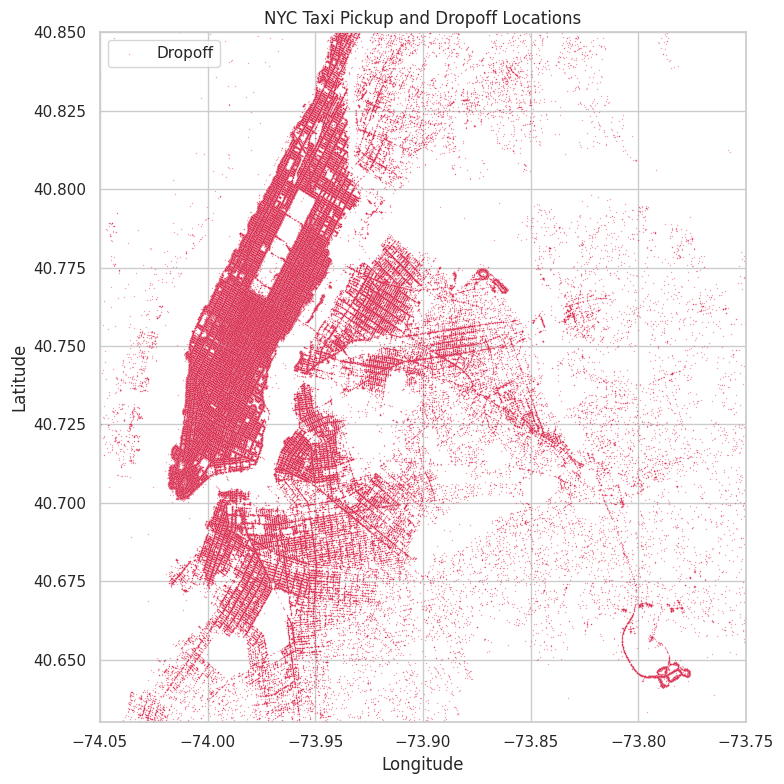

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

# Plot pickup (biru) dan dropoff (merah)
sns.scatterplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'],
                s=1, alpha=0.4, label="Dropoff", color='crimson')



# Zoom to NYC area
plt.xlim(-74.05, -73.75)
plt.ylim(40.63, 40.85)

plt.title('NYC Taxi Pickup and Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'trip_duration_minutes', 'trip_duration_hours', 'distance', 'speed',
       'log_speed', 'log_distance', 'pickup_lat_bin', 'pickup_lon_bin',
       'pickup_area_fast_area', 'pickup_area_medium_area',
       'pickup_area_slow_area'],
      dtype='object')

In [ ]:
# prompt: add rush_hour column that have value 1 when hour is 12-18 and 22-23

df['rush_hour'] = df['pickup_hour'].apply(lambda x: 1 if (x >= 12 and x < 18) or (x >= 22 and x < 24) else 0)

print(df[['pickup_hour', 'rush_hour']].head())

   pickup_hour  rush_hour
0           17          1
1            0          0
2           11          0
3           19          0
4           13          1


In [ ]:
# prompt: add speedy column that have value 1 when average speed on that hour is >17

avg_speed_by_hour = df.groupby('pickup_hour')['speed'].transform('mean')
df['speedy'] = (avg_speed_by_hour > 17).astype(int)
print(df[['pickup_hour', 'speedy']].head())
print(df['speedy'].value_counts())

   pickup_hour  speedy
0           17       0
1            0       1
2           11       0
3           19       0
4           13       0
speedy
0    1248833
1     203842
Name: count, dtype: int64


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'trip_duration_minutes', 'trip_duration_hours', 'distance', 'speed',
       'log_speed', 'log_distance', 'pickup_lat_bin', 'pickup_lon_bin',
       'pickup_area_fast_area', 'pickup_area_medium_area',
       'pickup_area_slow_area', 'rush_hour', 'speedy'],
      dtype='object')

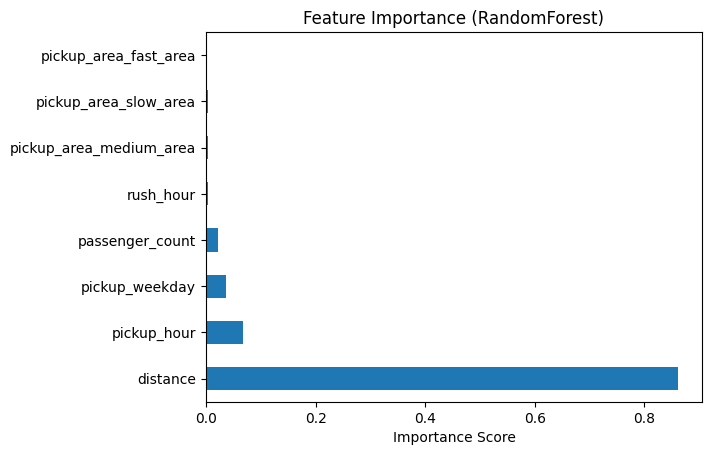

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df[['passenger_count', 'pickup_hour', 'pickup_weekday', 'distance','pickup_area_fast_area', 'pickup_area_medium_area', 'pickup_area_slow_area', 'rush_hour']]  # contoh awal
y = np.log1p(df['trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind='barh', title='Feature Importance (RandomForest)')
plt.xlabel('Importance Score')
plt.show()


In [ ]:
features = [
      'pickup_hour',
     'pickup_month',
     'log_distance',
     'pickup_weekday',
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
     'pickup_area_fast_area', 'pickup_area_medium_area', 'pickup_area_slow_area'
    ,'rush_hour','speedy','passenger_count'

]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1. Pisahkan fitur dan target
X = df[features]
y = np.log1p(df['trip_duration'])  # log-transform untuk stabilkan distribusi

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Scaling (standardisasi)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Feature & Target


# Model candidates
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),

}

# Evaluate R² CV
for name, model in models.items():
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2').mean()
    print(f"{name}: R² CV = {r2:.4f}")



Linear Regression: R² CV = 0.6176
Decision Tree: R² CV = 0.5541


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd


models = {
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=300),
    "LGBM": LGBMRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}


# Evaluate R² CV
for name, model in models.items():
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2').mean()
    print(f"{name}: R² CV = {r2:.4f}")


MLP Regressor: R² CV = 0.6826
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.160659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 761258, number of used features: 13
[LightGBM] [Info] Start training from score 6.438862
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.112175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 761259, number of used features: 13
[LightGBM] [Info] Start training from score 6.439187
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 761259, number of used feature

KeyboardInterrupt: 

In [ ]:
models = {

    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}


# Evaluate R² CV
for name, model in models.items():
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2').mean()
    print(f"{name}: R² CV = {r2:.4f}")

Gradient Boosting: R² CV = 0.7205
Random Forest: R² CV = 0.7822


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Preprocessing
X = df[features]
y = np.log1p(df['trip_duration'])  # Jika masih menggunakan log transform



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model DNN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f"✅ R² Score on Test Set: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 1.0077 - val_loss: 1.4933
Epoch 2/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.2118 - val_loss: 0.4244
Epoch 3/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1992 - val_loss: 0.3495
Epoch 4/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1931 - val_loss: 0.2598
Epoch 5/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1915 - val_loss: 0.3483
Epoch 6/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.1884 - val_loss: 0.3311
Epoch 7/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1887 - val_loss: 0.2702
Epoch 8/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.1880 - val_loss: 0.2710
Epoch 9/100
7137/7137 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.1880 - val_loss: 0.2628
8921/8921 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
✅ R² Score on Test Set: 0.5199


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd


# Grid search on RandomForest
param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_leaf': [5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("✅ Best Params:", grid.best_params_)

# Evaluation
y_pred = grid.predict(X_test)
rmse = mean_squared_error((y_test), (y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (seconds): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


NameError: name 'X_train' is not defined

In [ ]:
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.model_selection import train_test_split as cuml_train_test_split
from cuml.metrics import r2_score as cuml_r2
from sklearn.metrics import mean_squared_error
import cupy as cp
import cudf
import itertools

# Konversi X dan y ke cuDF
X_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(X))
y_cudf = cudf.Series(y.values)

# Split data
X_train, X_test, y_train, y_test = cuml_train_test_split(X_cudf, y_cudf, test_size=0.2, random_state=42)

# Grid parameter
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_leaf': [5]
}

# Semua kombinasi parameter
param_combinations = list(itertools.product(*param_grid.values()))

best_score = -np.inf
best_params = None

print("🚀 Mulai manual grid search...\n")

for n_estimators, max_depth, min_samples_leaf in param_combinations:
    model = cuRF(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = cuml_r2(y_test, y_pred)
    rmse = mean_squared_error(cp.asnumpy(y_test), cp.asnumpy(y_pred))

    print(f"Params: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf} | R²: {r2:.4f} | RMSE: {rmse:.2f}")

    if r2 > best_score:
        best_score = r2
        best_params = (n_estimators, max_depth, min_samples_leaf)

print("\n✅ Best Params:", best_params)
print(f"✅ Best R² Score: {best_score:.4f}")


🚀 Mulai manual grid search...



/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:368: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)


TypeError: '<=' not supported between instances of 'NoneType' and 'int'